In [ ]:
import pandas as pd  # Import the pandas library

df3 = pd.read_csv('Titanic_train.csv')  # Read the CSV file into a DataFrame

df3.head(10)  # Display the first 10 rows of the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print(df3.isnull().sum())  # Print the number of missing values for each column
print(df3.shape)  # Print the shape (number of rows and columns) of the DataFrame
print(df3.dtypes)  # Print the data types of each column in the DataFrame

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
df3.drop(['Cabin'], axis=1, inplace=True)  # Commented out: Drop the 'Cabin' column from the DataFrame
df3.head(10)  # Display the first 10 rows of the DataFrame
print(df3.isnull().sum())  # Print the number of missing values for each column
df3.dropna(inplace=True)  # Remove rows with any missing values
print(df3.shape)  # Print the shape (number of rows and columns) of the DataFrame after dropping missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
(712, 11)


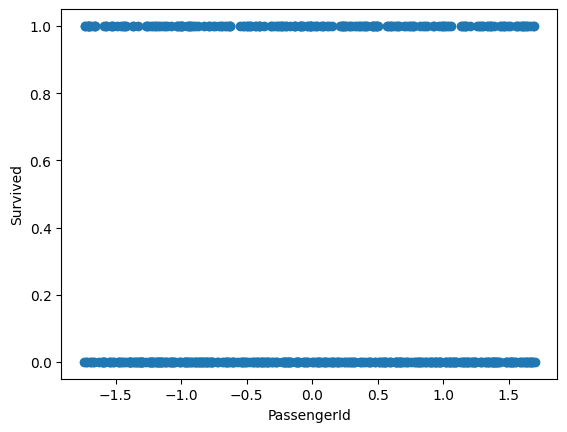

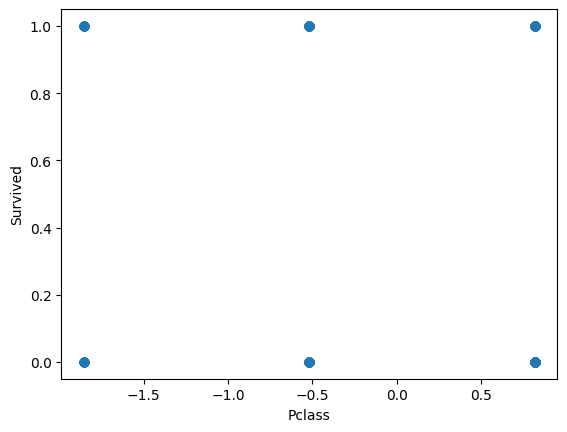

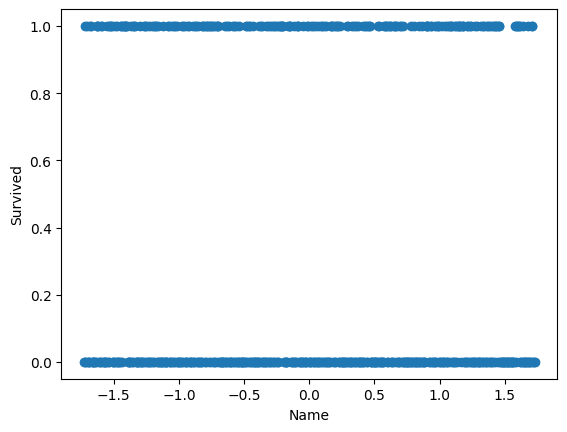

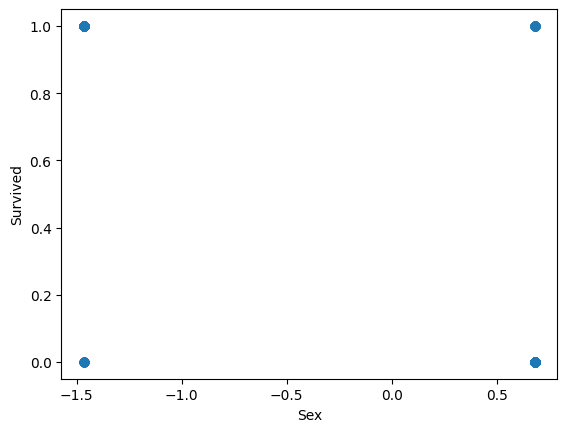

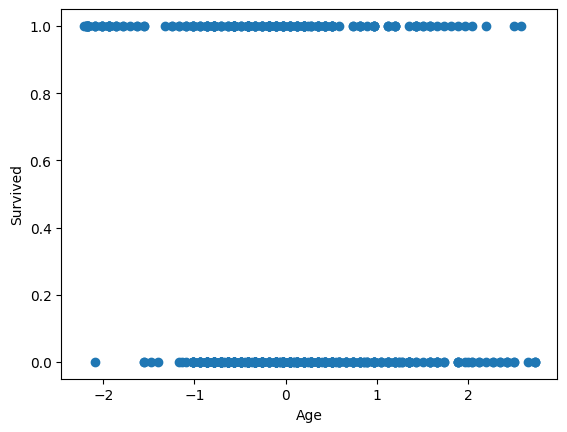

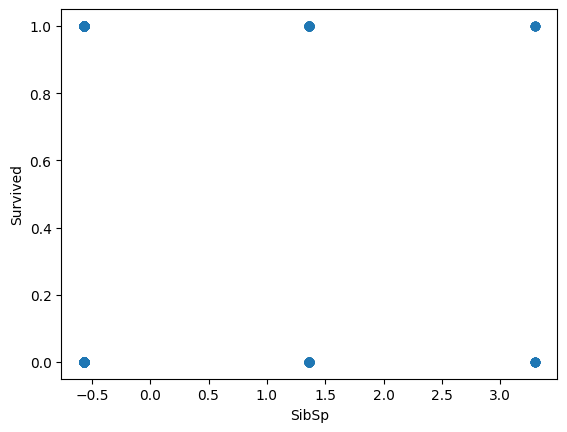

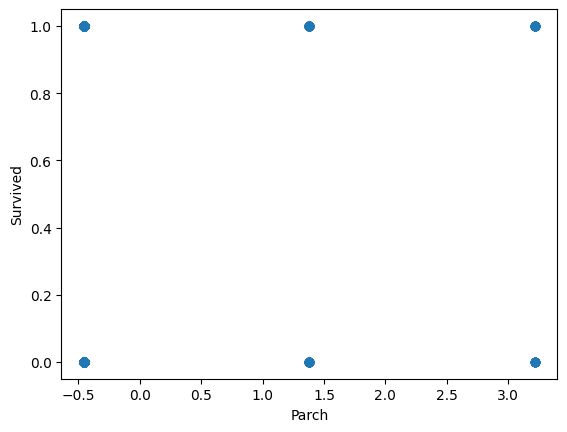

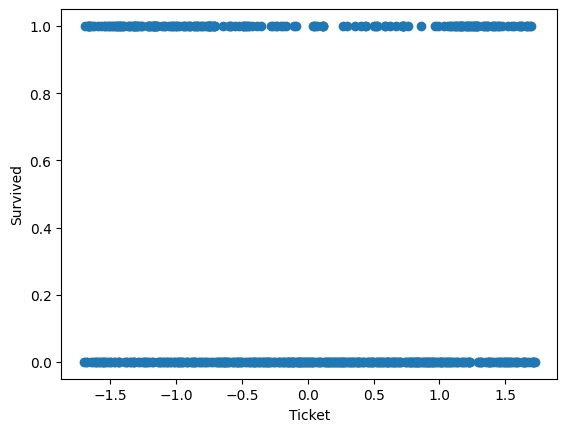

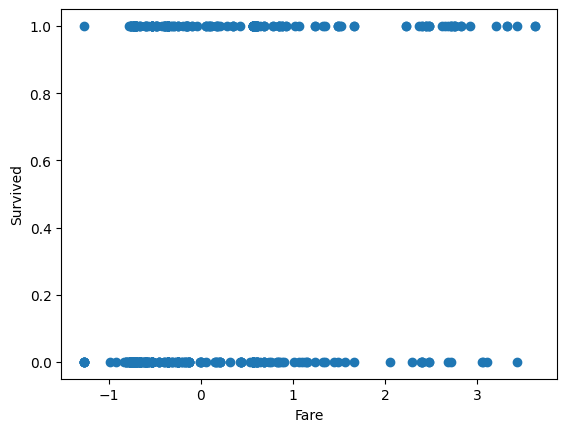

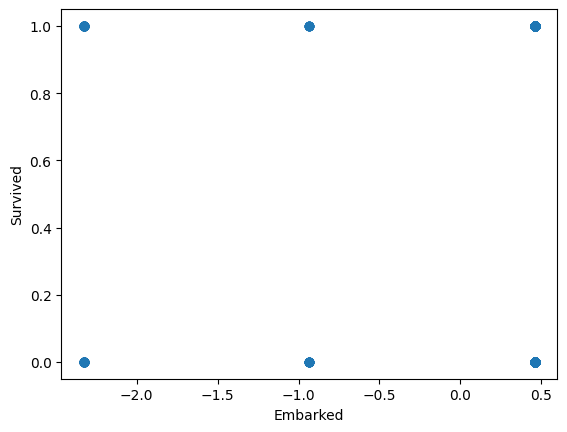

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
import seaborn as sns  # Import the seaborn library for advanced data visualization

for i in df3.columns:  # Iterate over each column in the DataFrame df3
  if i != 'Survived':  # Check if the column is not 'Survived'
    plt.scatter(df3[i], df3['Survived'])  # Create a scatter plot of the current column vs 'Survived'
    plt.xlabel(i)  # Set the x-axis label to the column name
    plt.ylabel('Survived')  # Set the y-axis label to 'Survived'
    plt.show()  # Display the plot

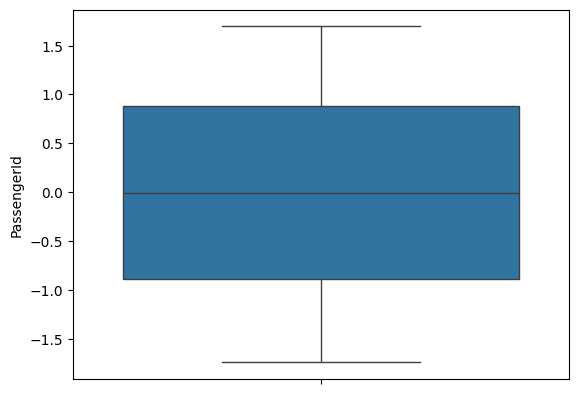

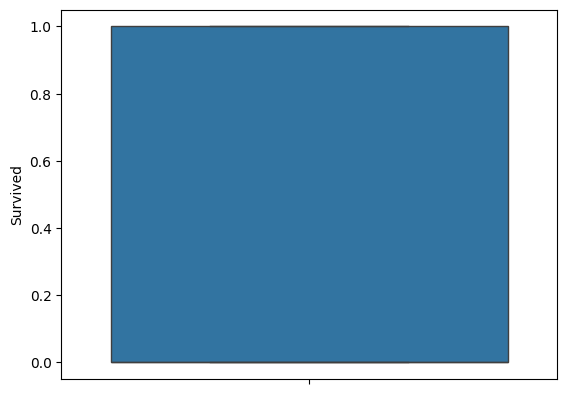

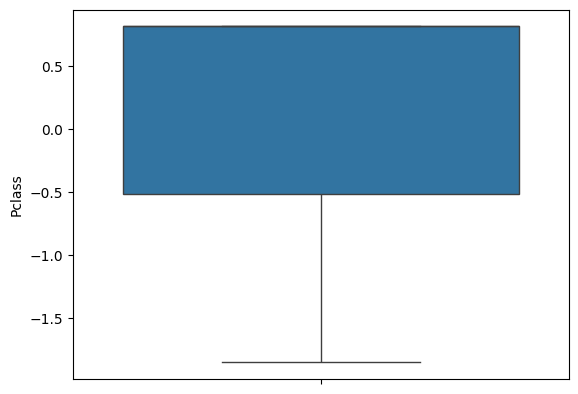

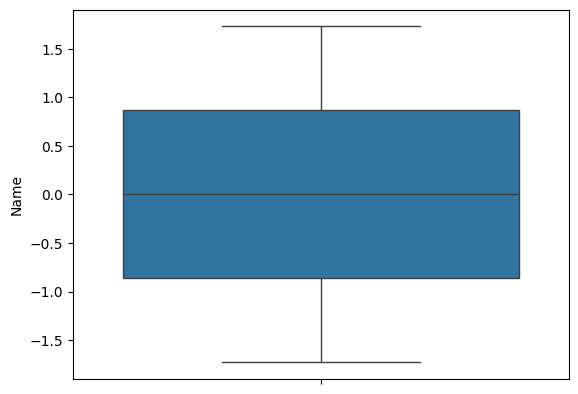

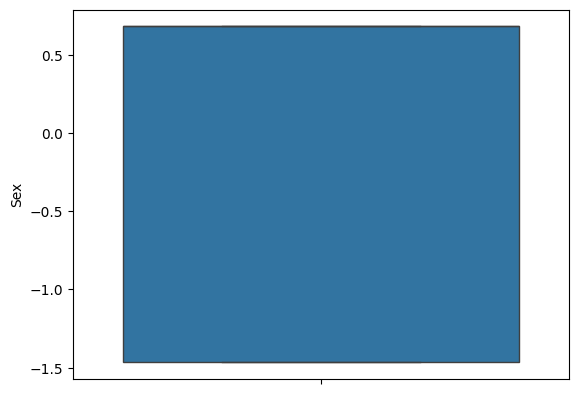

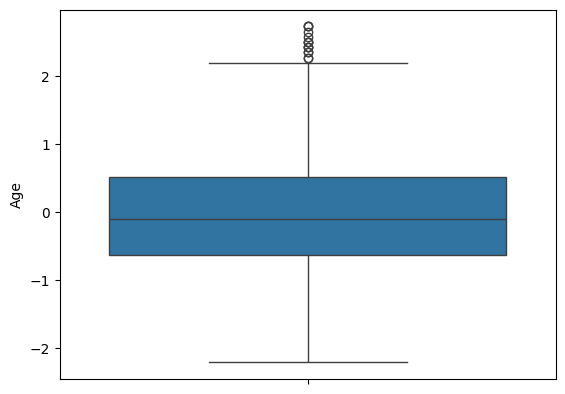

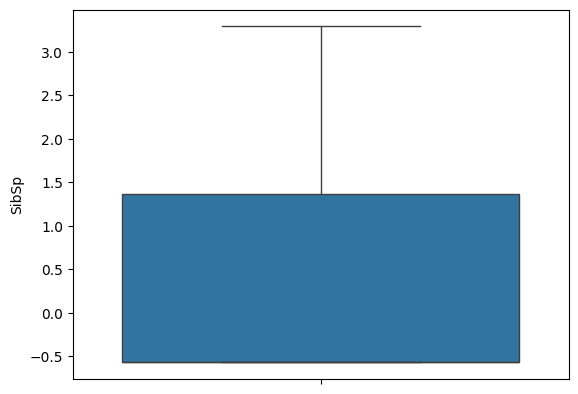

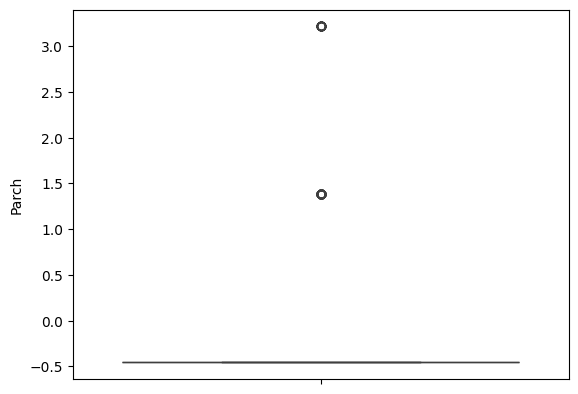

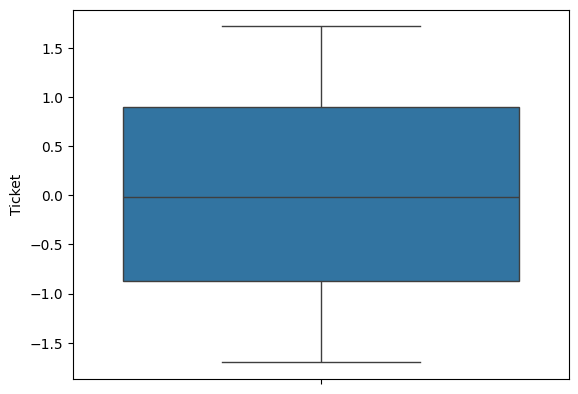

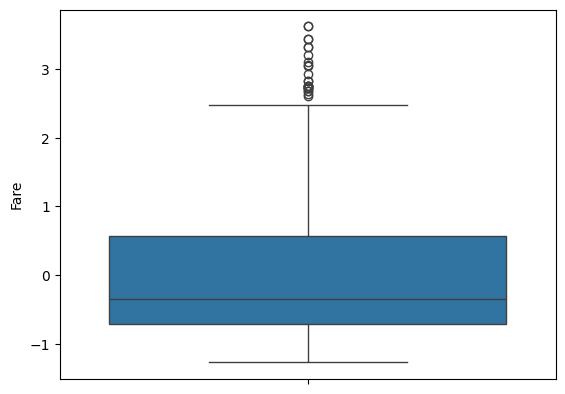

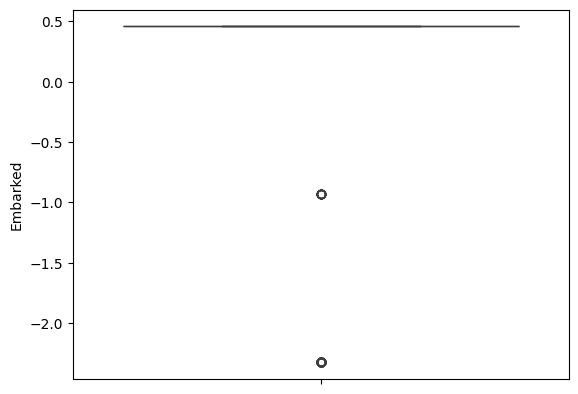

In [ ]:
for i in df3.columns:  # Iterate over each column in the DataFrame df3
  sns.boxplot(df3[i])  # Create a box plot for the current column
  plt.show()  # Display the plot

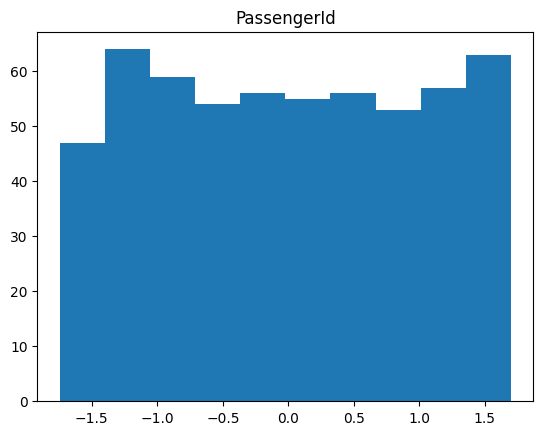

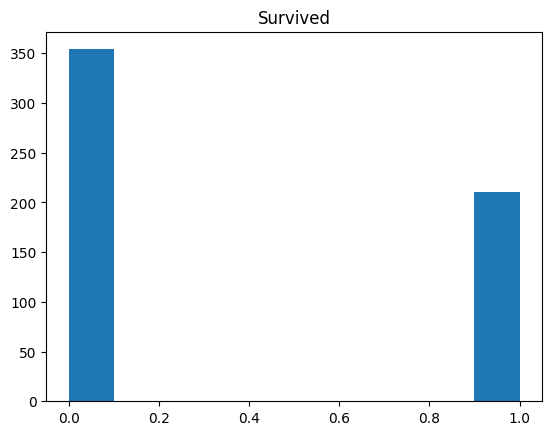

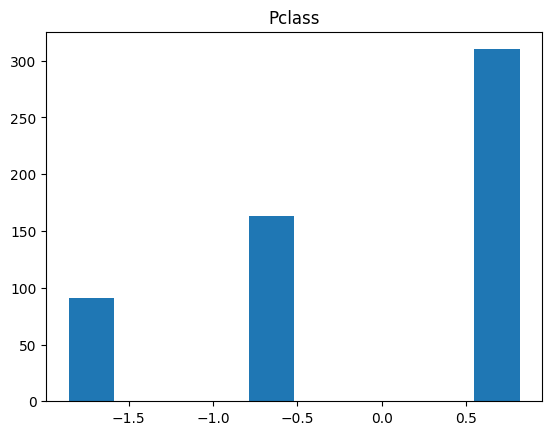

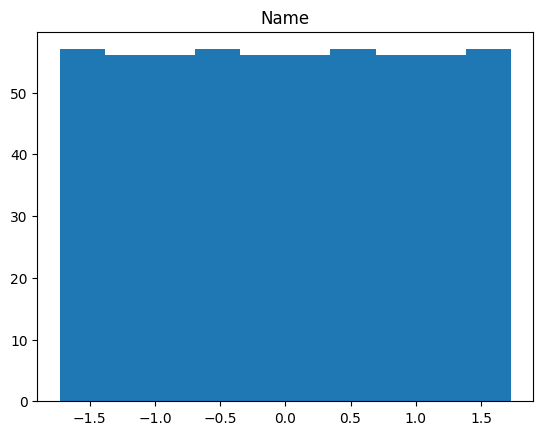

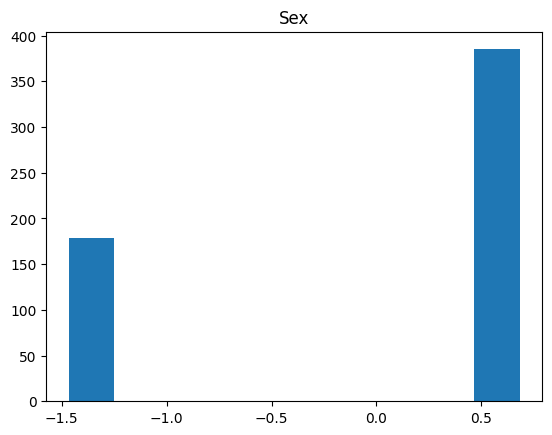

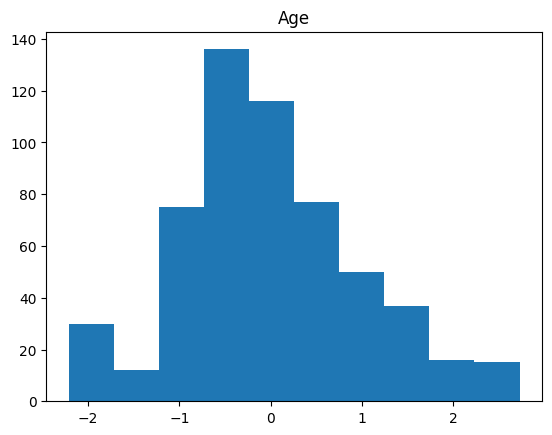

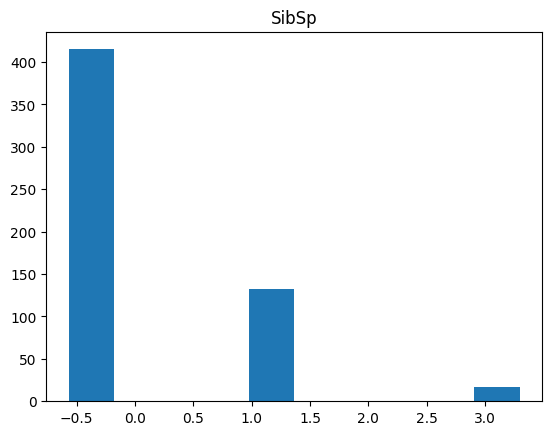

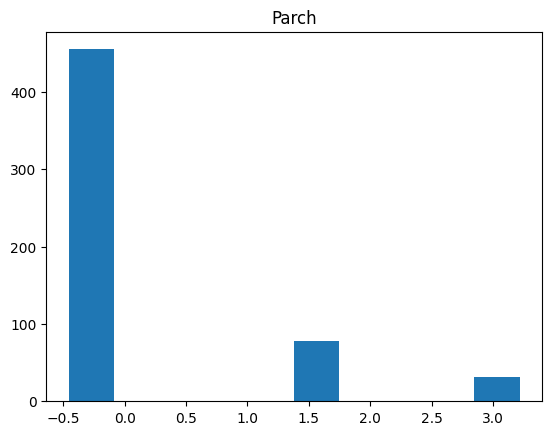

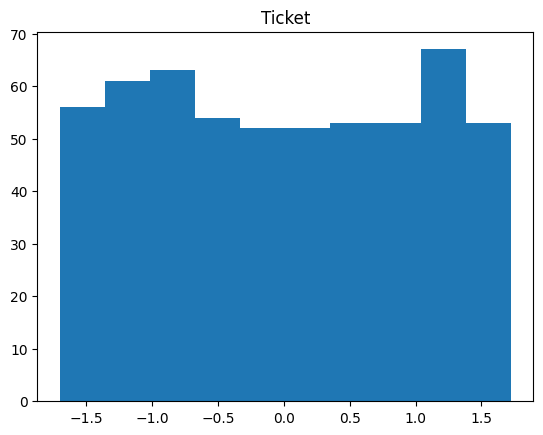

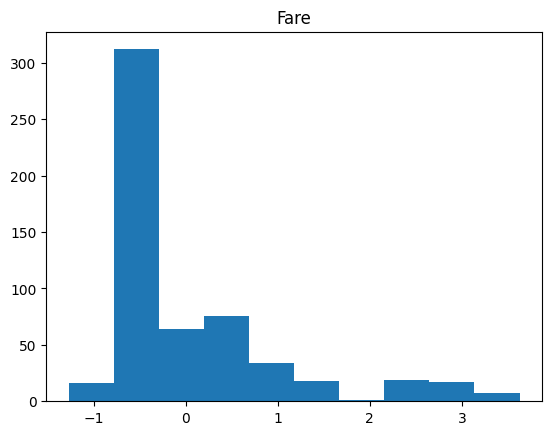

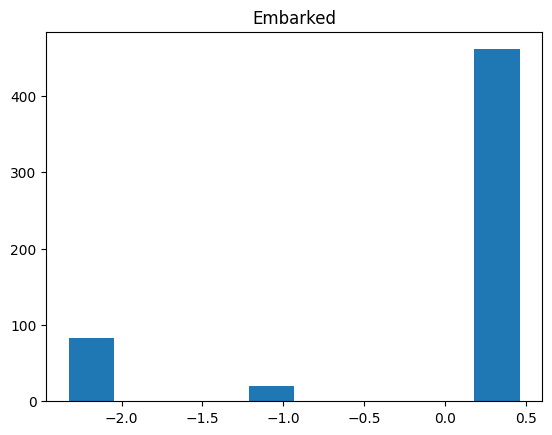

In [ ]:
for i in df3.columns:  # Iterate over each column in the DataFrame df3
  plt.hist(df3[i])  # Create a histogram for the current column
  plt.title(i)  # Set the title of the histogram to the column name
  plt.show()  # Display the histogram

In [ ]:
num_col = df3.select_dtypes(include=['int64', 'float64']).columns

Q1 = df3[num_col].quantile(0.25)  # Calculate the first quartile (25th percentile) for each numeric column
Q3 = df3[num_col].quantile(0.75) # Calculate the third quartile (75th percentile) for each numeric column
IQR = Q3 - Q1

df3 = df3[~((df3[num_col] < (Q1 - 1.5 * IQR)) | (df3[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]  # Remove outliers using the IQR method
print(df3.shape)  # Print the shape (number of rows and columns) of the DataFrame after outlier removal

(564, 11)


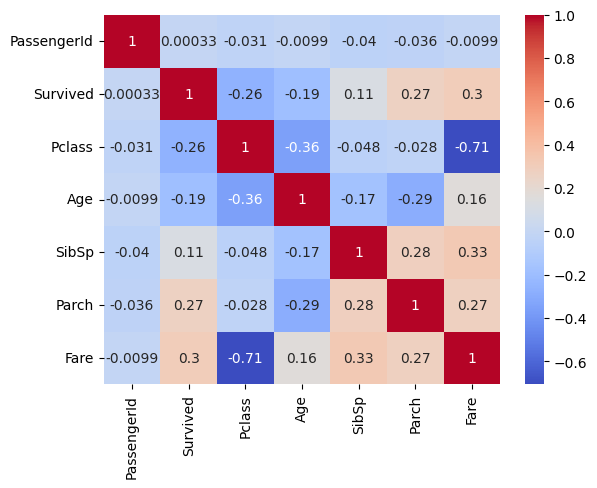

In [ ]:
sns.heatmap(df3[num_col].corr(), cmap='coolwarm', annot=True)  # Create a heatmap of the correlation matrix for numeric columns, using a coolwarm color map and annotating the cells with correlation values
plt.show()  # Display the heatmap

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def encode(df): #Function to perform Label encoding
    le = LabelEncoder()
    for col in df.columns:
      if col != 'Survived':
          if df[col].dtype == 'object':
              df[col] = le.fit_transform(df[col])
    return df

def scale(df):  #Function to perform standardisation
    scaler = StandardScaler()
    for col in df.columns:
      if col != 'Survived' and df[col].dtype != 'object':
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    return df

df3 = encode(df3) #label encode
df3 = scale(df3) #standardization
df3.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.743013,0,0.817263,-1.280614,0.681861,-0.561335,1.363174,-0.455835,0.933335,-0.760066,0.459390
2,-1.735281,1,0.817263,-0.248752,-1.466574,-0.255060,-0.568560,-0.455835,1.666781,-0.712349,0.459390
3,-1.731415,1,-1.854831,-0.561996,-1.466574,0.434060,1.363174,-0.455835,-1.466387,2.481172,0.459390
4,-1.727549,0,0.817263,-1.642994,0.681861,0.434060,-0.568560,-0.455835,0.691226,-0.703512,0.459390
6,-1.719816,0,-1.854831,0.420729,0.681861,1.888867,-0.568560,-0.455835,-1.316850,2.393690,0.459390
8,-1.712084,1,0.817263,0.015355,-1.466574,-0.178491,-0.568560,3.216893,0.114438,-0.485547,0.459390
9,-1.708218,1,-0.518784,0.598848,-1.466574,-1.173885,1.363174,-0.455835,-1.039137,0.853187,-2.326586
10,-1.704352,1,0.817263,1.090211,-1.466574,-1.939574,1.363174,1.380529,1.360585,-0.092025,0.459390
11,-1.700485,1,-1.854831,-1.335892,-1.466574,2.195142,-0.568560,-0.455835,-1.537596,0.604294,0.459390
12,-1.696619,0,0.817263,1.102495,0.681861,-0.714473,-0.568560,-0.455835,1.004543,-0.703512,0.459390


In [ ]:
from sklearn.model_selection import train_test_split

X = df3.drop('Survived', axis=1) # Define feature variables by dropping the 'Survived' column from the DataFrame
y = df3['Survived']  # Define the target variable 'Survived'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # Split the data into training and test sets (80% train, 20% test) with a fixed random seed for reproducibility

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

xgb = XGBClassifier(
    learning_rate=0.5, # Set the learning rate for the boosting process
    n_estimators=1000,  # Number of boosting rounds
    max_depth=6,  # Maximum depth of each tree
    alpha=1,  # L1 regularization term on weights
    gamma=10,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Fraction of samples used for fitting individual trees
    colsample_bytree=0.8,  # Fraction of features used for fitting individual trees
    objective='binary:logistic',  # Specify the learning task and corresponding objective function
    n_jobs=-1,  # Number of parallel threads used to run XGBoost
    random_state=1  # Seed for random number generation
)

xgb.fit(X_train, y_train)
y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb_test = xgb.predict(X_test)

xgb_accuracy_train = accuracy_score(y_train, y_pred_xgb_train)
xgb_accuracy_test = accuracy_score(y_test, y_pred_xgb_test)
xgb_precision_train = precision_score(y_train, y_pred_xgb_train)
xgb_precision_test = precision_score(y_test, y_pred_xgb_test)
xgb_recall_train = recall_score(y_train, y_pred_xgb_train)
xgb_recall_test = recall_score(y_test, y_pred_xgb_test)
xgb_f1_train = f1_score(y_train, y_pred_xgb_train)
xgb_f1_test = f1_score(y_test, y_pred_xgb_test)

print('XGBoost Train Accuracy:', xgb_accuracy_train)
print('XGBoost Test Accuracy:', xgb_accuracy_test)
print('XGBoost Train Precision:', xgb_precision_train)
print('XGBoost Test Precision:', xgb_precision_test)
print('XGBoost Train Recall:', xgb_recall_train)
print('XGBoost Test Recall:', xgb_recall_test)
print('XGBoost Train F1:', xgb_f1_train)
print('XGBoost Test F1:', xgb_f1_test)

XGBoost Train Accuracy: 0.8137472283813747
XGBoost Test Accuracy: 0.7964601769911505
XGBoost Train Precision: 0.7947019867549668
XGBoost Test Precision: 0.71875
XGBoost Train Recall: 0.6936416184971098
XGBoost Test Recall: 0.6216216216216216
XGBoost Train F1: 0.7407407407407407
XGBoost Test F1: 0.6666666666666667


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

X_SS = StandardScaler().fit_transform(X)

training_err = [] # Initialize a list to store training errors
test_err = [] # Initialize a list to store test errors

for i in range(1,101):  # Loop over 100 different random states for train-test splitting
    X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2,random_state=i)
    model = XGBClassifier(learning_rate=0.5,gamma=140,alpha=0.5,n_estimators=100)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_err.append(mean_squared_error(Y_train,Y_pred_train,squared=False))
    test_err.append(mean_squared_error(Y_test,Y_pred_test,squared=False))

import numpy as np
print("Cross validation - Training error:" ,np.mean(training_err).round(2))
print("Cross validation - Test error:" ,np.mean(test_err).round(2))
print("XGBBoost -variance :" ,(np.mean(test_err)-np.mean(training_err)).round(2))

Cross validation - Training error: 0.61
Cross validation - Test error: 0.61
XGBBoost -variance : 0.0


In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    learning_rate=0.05,  # Set the learning rate for the boosting process
    num_leaves=15,  # Number of leaves in one tree
    n_estimators=100,  # Number of boosting iterations
    max_depth=4,  # Maximum depth of the trees
    min_child_samples=10,  # Minimum number of samples required to be at a leaf node
    random_state=1 # Seed for random number generation
)

lgb.fit(X_train, y_train)
y_pred_lgb_train = lgb.predict(X_train)
y_pred_lgb_test = lgb.predict(X_test)

lgb_accuracy_train = accuracy_score(y_train, y_pred_lgb_train)
lgb_accuracy_test = accuracy_score(y_test, y_pred_lgb_test)
lgb_precision_train = precision_score(y_train, y_pred_lgb_train, average='macro')
lgb_precision_test = precision_score(y_test, y_pred_lgb_test, average='macro')
lgb_recall_train = recall_score(y_train, y_pred_lgb_train, average='macro')
lgb_recall_test = recall_score(y_test, y_pred_lgb_test, average='macro')
lgb_f1_train = f1_score(y_train, y_pred_lgb_train, average='macro')
lgb_f1_test = f1_score(y_test, y_pred_lgb_test, average='macro')

print('LightGBM Train Accuracy:', lgb_accuracy_train)
print('LightGBM Test Accuracy:', lgb_accuracy_test)
print('LightGBM Train Precision:', lgb_precision_train)
print('LightGBM Test Precision:', lgb_precision_test)
print('LightGBM Train Recall:', lgb_recall_train)
print('LightGBM Test Recall:', lgb_recall_test)
print('LightGBM Train F1:', lgb_f1_train)
print('LightGBM Test F1:', lgb_f1_test)

[LightGBM] [Info] Number of positive: 173, number of negative: 278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 451, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383592 -> initscore=-0.474330
[LightGBM] [Info] Start training from score -0.474330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
training_lgbm_err = []
test_lgbm_err = []

for i in range(1, 101): # Loop over 100 different random states for train-test splitting
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LGBMClassifier(
        learning_rate=0.05,
        num_leaves=15,
        n_estimators=100,
        max_depth=4,
        min_child_samples=10,
        random_state=1
    )
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_lgbm_err.append(mean_squared_error(Y_train, Y_pred_train, squared=False))
    test_lgbm_err.append(mean_squared_error(Y_test, Y_pred_test, squared=False))

print("Cross-validation - Training error:", np.mean(training_lgbm_err).round(2))
print("Cross-validation - Test error:", np.mean(test_lgbm_err).round(2))
print("LightGBM - Variance:", (np.mean(test_lgbm_err) - np.mean(training_lgbm_err)).round(2))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
df2 = pd.read_csv('Titanic_test.csv')

df2.head(10)   # Display the first 10 rows of the DataFrame

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
print(df2.isnull().sum())
print(df2.shape)
print(df2.dtypes)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
(418, 11)
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
df2.drop(['Cabin'], axis=1, inplace=True)
df2.head(10)
df2.dropna(inplace=True)
print(df2.isnull().sum())
print(df2.shape)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
(331, 10)


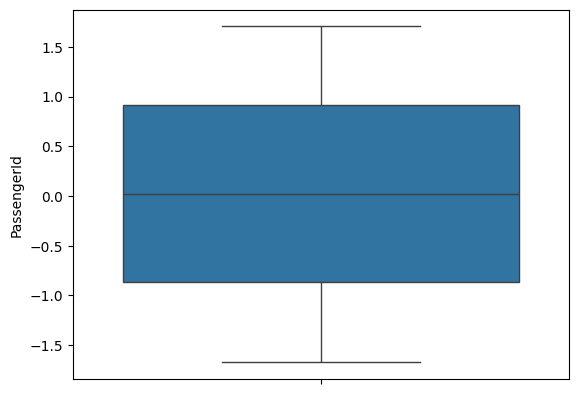

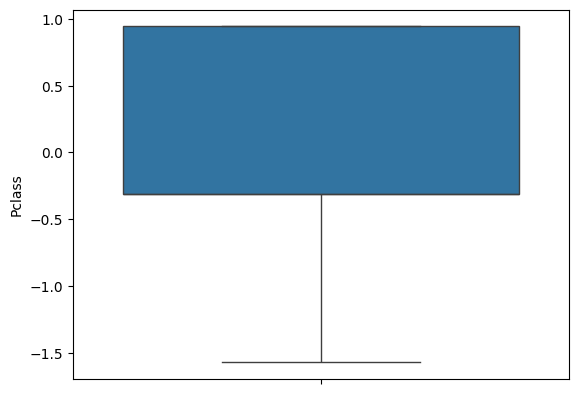

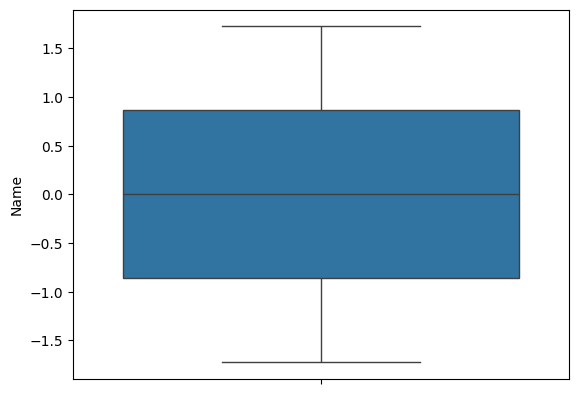

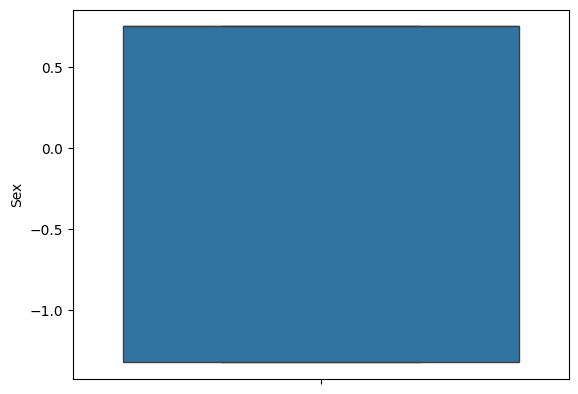

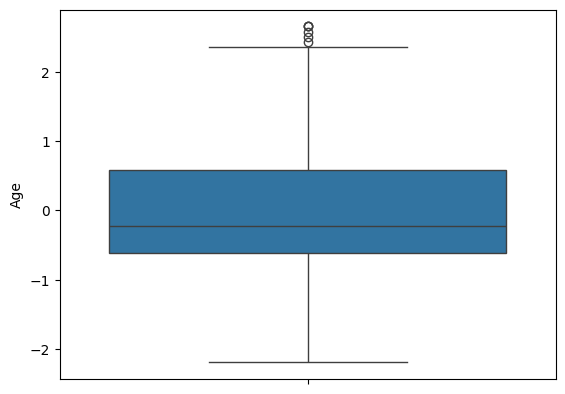

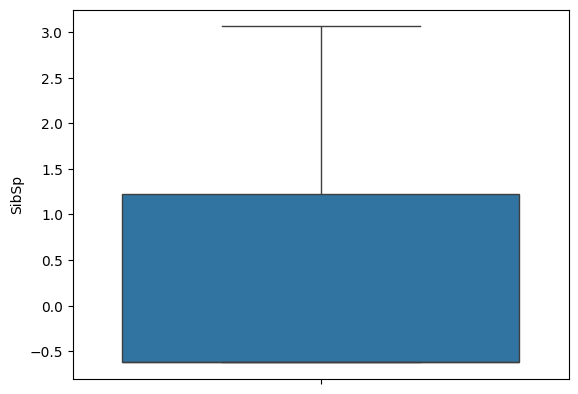

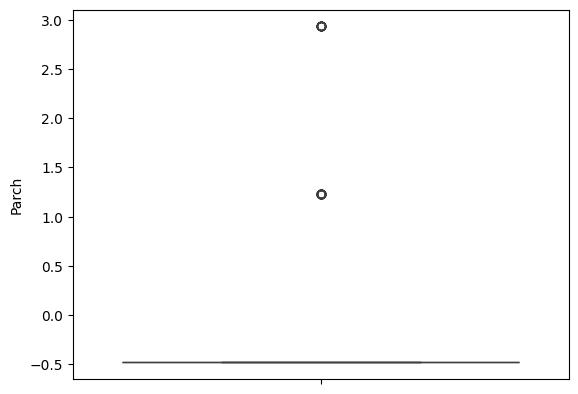

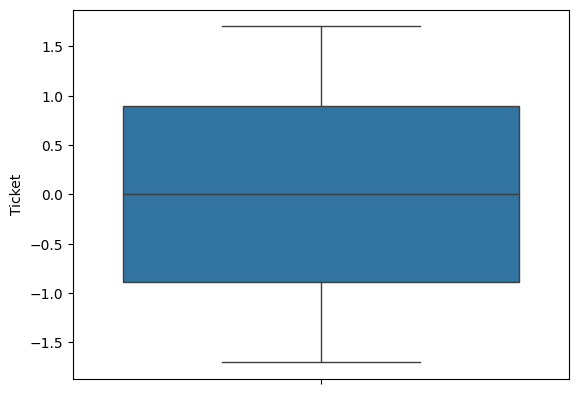

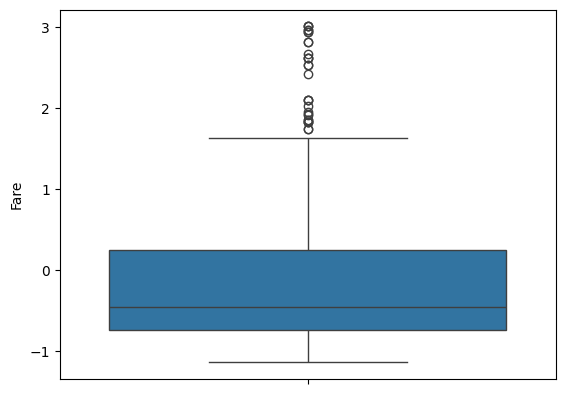

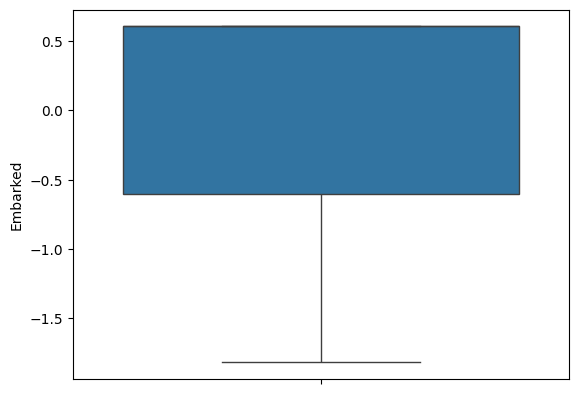

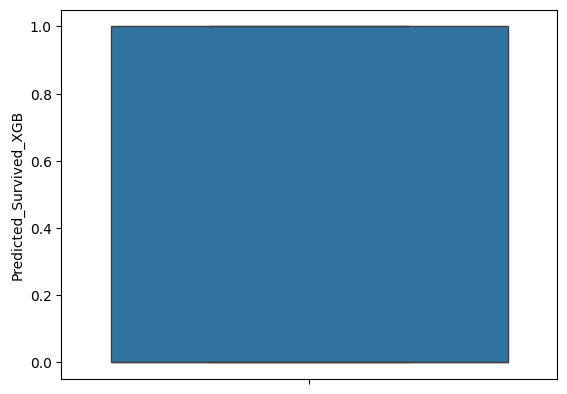

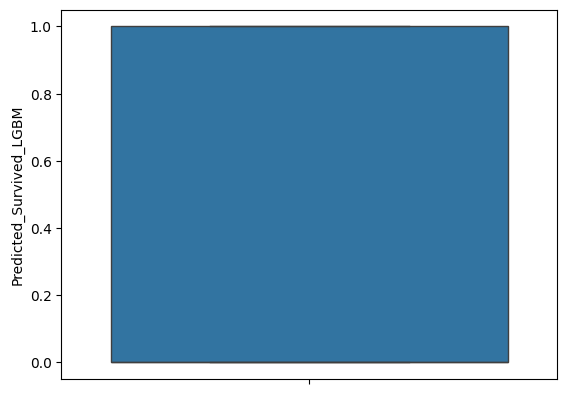

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df2.columns:
  sns.boxplot(df2[i])
  plt.show()

In [ ]:
num_col = df2.select_dtypes(include=['int64', 'float64']).columns

Q1 = df2[num_col].quantile(0.25)
Q3 = df2[num_col].quantile(0.75)
IQR = Q3 - Q1

df2 = df2[~((df2[num_col] < (Q1 - 1.5 * IQR)) | (df2[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)

(284, 10)


In [ ]:
df2 = encode(df2) # Encode categorical variables in df2
df2 = scale(df2)  # Scale numerical features in df2
df2.head(10)

<ipython-input-17-cdaa274c8415>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-17-cdaa274c8415>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-17-cdaa274c8415>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.672562,0.944041,0.189063,0.754361,0.412952,-0.623219,-0.480847,-0.126668,-0.743670,-0.606528
1,-1.664422,0.944041,1.591789,-1.325625,1.362420,1.220470,-0.480847,0.522821,-0.785014,0.606528
2,-1.656282,-0.314680,0.615980,0.754361,2.501781,-0.623219,-0.480847,-0.974981,-0.651016,-0.606528
3,-1.648142,0.944041,1.628382,0.754361,-0.156729,-0.623219,-0.480847,-0.179688,-0.702122,0.606528
4,-1.640002,0.944041,-0.079285,-1.325625,-0.536516,1.220470,1.226160,-0.298982,-0.521380,0.606528
5,-1.631862,0.944041,1.299046,0.754361,-1.144176,-0.623219,-0.480847,0.734899,-0.674076,0.606528
6,-1.623722,0.944041,-0.933118,-1.325625,0.071143,-0.623219,-0.480847,-0.086903,-0.753642,-0.606528
7,-1.615582,-0.314680,-1.164872,0.754361,-0.232687,1.220470,1.226160,-0.842432,0.311903,0.606528
8,-1.607442,0.944041,-1.677172,-1.325625,-0.840346,-0.623219,-0.480847,-0.683373,-0.773586,-1.819583
9,-1.599302,0.944041,-0.737956,0.754361,-0.612474,3.064160,-0.480847,0.801174,0.070083,0.606528


In [ ]:
predicted_survived_xgb = xgb.predict(df2)  # Predict the survival outcomes using the XGBoost model
predicted_survived_lgbm = lgb.predict(df2) # Predict the survival outcomes using the LightGBM model

predicted_list_xgb = []  # Initialize an empty list to store XGBoost predictions
predicted_list_lgbm = []  # Initialize an empty list to store LightGBM predictions


for i in predicted_survived_xgb:  # Loop over XGBoost predictions (commented out)
  predicted_list_xgb.append(int(i))

for i in predicted_survived_lgbm:  # Loop over LightGBM predictions (commented out)
  predicted_list_lgbm.append(int(i))


print('XGB :\n', predicted_list_xgb)
print('LGBM :\n', predicted_list_lgbm)

df2['Predicted_Survived_XGB'] = predicted_survived_xgb  # Add XGBoost predictions as a new column to df2 (commented out)
df2['Predicted_Survived_LGBM'] = predicted_survived_lgbm  # Add LightGBM predictions as a new column to df2 (commented out)

df2.to_csv('submission.csv', index=False)  # Save df2 with predictions to a CSV file named 'submission.csv' without the index

df2.head(10)

XGB :
 []
LGBM :
 []


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Predicted_Survived_XGB,Predicted_Survived_LGBM
0,-1.672562,0.944041,0.189063,0.754361,0.412952,-0.623219,-0.480847,-0.126668,-0.743670,-0.606528,0,0
1,-1.664422,0.944041,1.591789,-1.325625,1.362420,1.220470,-0.480847,0.522821,-0.785014,0.606528,0,0
2,-1.656282,-0.314680,0.615980,0.754361,2.501781,-0.623219,-0.480847,-0.974981,-0.651016,-0.606528,0,0
3,-1.648142,0.944041,1.628382,0.754361,-0.156729,-0.623219,-0.480847,-0.179688,-0.702122,0.606528,0,0
4,-1.640002,0.944041,-0.079285,-1.325625,-0.536516,1.220470,1.226160,-0.298982,-0.521380,0.606528,1,1
5,-1.631862,0.944041,1.299046,0.754361,-1.144176,-0.623219,-0.480847,0.734899,-0.674076,0.606528,0,0
6,-1.623722,0.944041,-0.933118,-1.325625,0.071143,-0.623219,-0.480847,-0.086903,-0.753642,-0.606528,0,1
7,-1.615582,-0.314680,-1.164872,0.754361,-0.232687,1.220470,1.226160,-0.842432,0.311903,0.606528,0,0
8,-1.607442,0.944041,-1.677172,-1.325625,-0.840346,-0.623219,-0.480847,-0.683373,-0.773586,-1.819583,0,1
9,-1.599302,0.944041,-0.737956,0.754361,-0.612474,3.064160,-0.480847,0.801174,0.070083,0.606528,0,0
